In [1]:
import pandas as pd
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller

In [2]:
data = pd.read_csv("freq_2412.csv")

In [3]:
adf_test = adfuller(data["Power"])
print(f"ADF Test p-value: {adf_test[1]}")

ADF Test p-value: 0.0636803575564207


In [5]:
model = pm.auto_arima(data["Power"], seasonal=False, stepwise=True, suppress_warnings=True)

C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\d

In [6]:
# Print the best order (p, d, q)
print(f"Best ARIMA order: {model.order}")

Best ARIMA order: (5, 1, 1)


In [8]:
best_model = model.fit(data["Power"])

C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [9]:
forecast = best_model.predict(n_periods=10)
print("Predictions:", forecast)

Predictions: 6260   -96.113652
6261   -96.481252
6262   -96.641556
6263   -96.655582
6264   -96.835593
6265   -96.673433
6266   -96.648487
6267   -96.664821
6268   -96.656531
6269   -96.641351
dtype: float64


C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
main_df = pd.read_csv("loc0_first100.csv")

In [4]:
X = main_df[["Day", "Time_of_Day", "frequency"]]
y = main_df["power"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# p = 5
# d = 1
# q = 2
sarimax_model = SARIMAX(y_train, exog=X_train, order=(5, 0, 2), seasonal_order=(0, 0, 0, 3))
sarimax_result = sarimax_model.fit()

C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [17]:
predictions_sarimax = sarimax_result.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1, exog=X_test)

rmse_sarimax = np.sqrt(mean_squared_error(y_test, predictions_sarimax))
print(f"SARIMAX RMSE: {rmse_sarimax}")

C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


SARIMAX RMSE: 4.723131274292378


In [6]:
adf_result = adfuller(main_df["power"])
print(f"ADF Test p-value: {adf_result[1]}") 

ADF Test p-value: 0.0


In [8]:
auto_arima_model = pm.auto_arima(main_df["power"], seasonal=False, trace=True, m=3, stepwise=True, suppress_warnings=True)
print(auto_arima_model.summary())

C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (3) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\u

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=139.30 sec


C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1200158.286, Time=2.62 sec


C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1178447.199, Time=3.24 sec


C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1146514.206, Time=9.42 sec


C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1200156.286, Time=1.34 sec


C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1144236.731, Time=17.39 sec


C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1129877.611, Time=21.09 sec


C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1138536.738, Time=4.03 sec


C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1129430.774, Time=35.98 sec


C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1133152.883, Time=6.10 sec


C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


KeyboardInterrupt: 

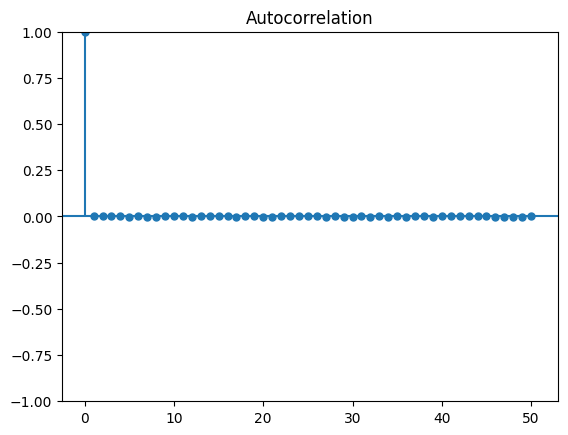

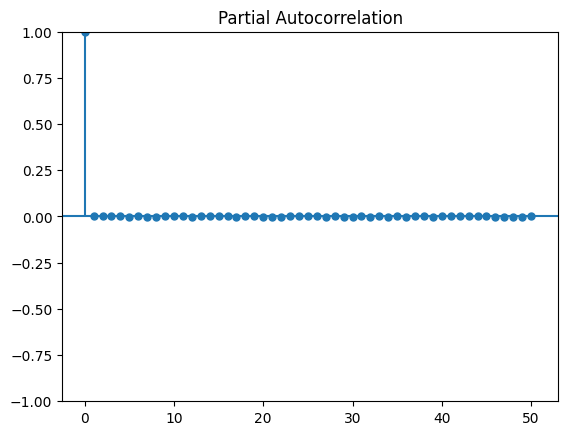

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(y_train, lags=50)  # Look for seasonal lags
plt.show()

plot_pacf(y_train, lags=50)  # Identify AR terms
plt.show()